
## How to Use the Notebooks

To run these notebooks, follow these steps:


### 1. Install **`gdal`** Package
Installing `gdal` via `pip` may fail. Therefore, we recommend using conda to install it:
```bash
conda install gdal -c conda-forge
```

### 2. Install **`polsartools`** Package

Before running the notebooks, you'll need to install the core **`polsartools`** package. 

**Option A:** Install from PyPI `pip` (stable release)

```bash
pip install polsartools
```

**Option B:** Install from conda (stable release)

```bash
conda install polsartools -c bnarayanarao
```


**Option C:**  Install the latest version from GitHub (if you need recent updates or fixes)

```bash
pip install git+https://github.com/Narayana-Rao/polsartools.git#egg=polsartools
```
> **Note:** If you encounter a `"module not found"` error or require newer features, prefer the **Option C**.

### 3. Verify the Installation

After successfully installing `polsartools`, you can verify it by importing the package:

```bash
import polsartools as pst
```

If this runs without errors, you're ready to explore and run the notebooks.




In [1]:
import polsartools as pst
import os
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
""" 

Function to display images

"""

def plot_images(*filenames, lower_percentile=2, upper_percentile=98, max_cols=4):
    def compute_vmin_vmax(data):
        data_no_nan = data[np.isfinite(data)]
        vmin = np.percentile(data_no_nan, lower_percentile)
        vmax = np.percentile(data_no_nan, upper_percentile)
        return vmin, vmax

    num_images = len(filenames)

    if num_images == 1:
        # Single image case
        data = pst.read_rst(filenames[0])
        data[data==0]=np.nan
        vmin, vmax = compute_vmin_vmax(data)

        fig, ax = plt.subplots(figsize=(6, 6))
        im = ax.imshow(data, vmin=vmin, vmax=vmax)
        ax.set_title(os.path.basename(filenames[0]))
        fig.colorbar(im, ax=ax)
        plt.tight_layout()
        plt.show()
    else:
        # Multiple image case
        ncols = min(max_cols, num_images)
        nrows = int(np.ceil(num_images / ncols))

        fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))
        axes = np.array(axes).reshape(-1)  # Flatten in case it's a 2D grid

        for i, filename in enumerate(filenames):
            data = pst.read_rst(filename)
            data[data==0]=np.nan
            vmin, vmax = compute_vmin_vmax(data)
            ax = axes[i]
            im = ax.imshow(data, vmin=vmin, vmax=vmax)
            ax.set_title(os.path.basename(filename))
            fig.colorbar(im, ax=ax)

        for j in range(num_images, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()


#### 1. Extract multilooked C4/C3/T4/T3 matrix from NISAR full-pol GSLC data
##### using **`polsartools.nisar_gslc`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/sensors/nisar.html#gslc-nisar-gslc) or run `print(polsartools.nisar_gslc.__.doc__)`


In [3]:
"""
The following function extracts a single-look S2 or multilooked C4/C3/T4/T3 matrix from NISAR full-polarimetric GSLC data. 

Provide path to the NISAR GSLC .h5 file.
"""

inFile =r"./NISAR/GSLC_QP.h5"

pst.nisar_gslc(inFile,azlks=2,rglks=2,matrixType='C3')


Detected L-band polarization channels: ['HH' 'HV' 'VV' 'VH']
Extracting C3 matrix elements...


Progress: 100%|████████████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.29it/s]


Saved file ./NISAR\GSLC_QP\C3\C11.tif
Saved file ./NISAR\GSLC_QP\C3\C12_real.tif
Saved file ./NISAR\GSLC_QP\C3\C12_imag.tif
Saved file ./NISAR\GSLC_QP\C3\C13_real.tif
Saved file ./NISAR\GSLC_QP\C3\C13_imag.tif
Saved file ./NISAR\GSLC_QP\C3\C22.tif
Saved file ./NISAR\GSLC_QP\C3\C23_real.tif
Saved file ./NISAR\GSLC_QP\C3\C23_imag.tif
Saved file ./NISAR\GSLC_QP\C3\C33.tif
Execution time for nisar_gslc: 8.00 seconds


#### 2. Speckle filtering using polarimetric refined-Lee filter

In [4]:

C3Folder = os.path.join(inFile.split('.h5')[0],'C3')
window_size = 3
pst.rlee(C3Folder,window_size=window_size)

Progress: 100%|███████████████████████████████████████████████████████████████████████| 9/9 [00:03<00:00,  2.38block/s]


Saved file ./NISAR/GSLC_QP\rlee_3x3\C3\C11.tif
Saved file ./NISAR/GSLC_QP\rlee_3x3\C3\C12_real.tif
Saved file ./NISAR/GSLC_QP\rlee_3x3\C3\C12_imag.tif
Saved file ./NISAR/GSLC_QP\rlee_3x3\C3\C13_real.tif
Saved file ./NISAR/GSLC_QP\rlee_3x3\C3\C13_imag.tif
Saved file ./NISAR/GSLC_QP\rlee_3x3\C3\C22.tif
Saved file ./NISAR/GSLC_QP\rlee_3x3\C3\C23_real.tif
Saved file ./NISAR/GSLC_QP\rlee_3x3\C3\C23_imag.tif
Saved file ./NISAR/GSLC_QP\rlee_3x3\C3\C33.tif
Execution time for rlee: 7.00 seconds


#### 3. Generate a quick look Pauli RGB from the extracted matrix

Pauli RGB image saved as ./NISAR/GSLC_QP\rlee_3x3\C3\PauliRGB.png
Execution time for pauliRGB: 2.00 seconds


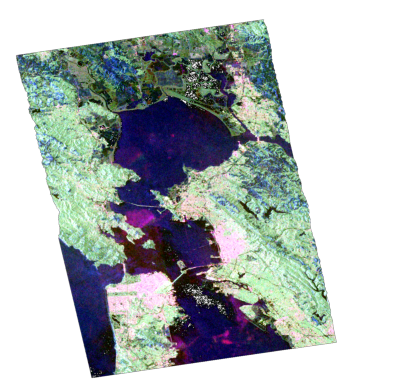

In [5]:
C3Folder = os.path.join(inFile.split('.h5')[0],f"rlee_{window_size}x{window_size}",'C3')
pst.pauliRGB(C3Folder)

#### 4. Generating Decomposition parameters

#### 4.1. Generate H/A/α Decomposition parameters

Progress: 100%|███████████████████████████████████████████████████████████████████████| 9/9 [00:34<00:00,  3.86s/block]


Saved file ./NISAR/GSLC_QP\rlee_3x3\C3\H_fp.tif
Saved file ./NISAR/GSLC_QP\rlee_3x3\C3\alpha_fp.tif
Saved file ./NISAR/GSLC_QP\rlee_3x3\C3\anisotropy_fp.tif
Saved file ./NISAR/GSLC_QP\rlee_3x3\C3\e1_norm.tif
Saved file ./NISAR/GSLC_QP\rlee_3x3\C3\e2_norm.tif
Saved file ./NISAR/GSLC_QP\rlee_3x3\C3\e3_norm.tif
Execution time for halphafp: 37.00 seconds


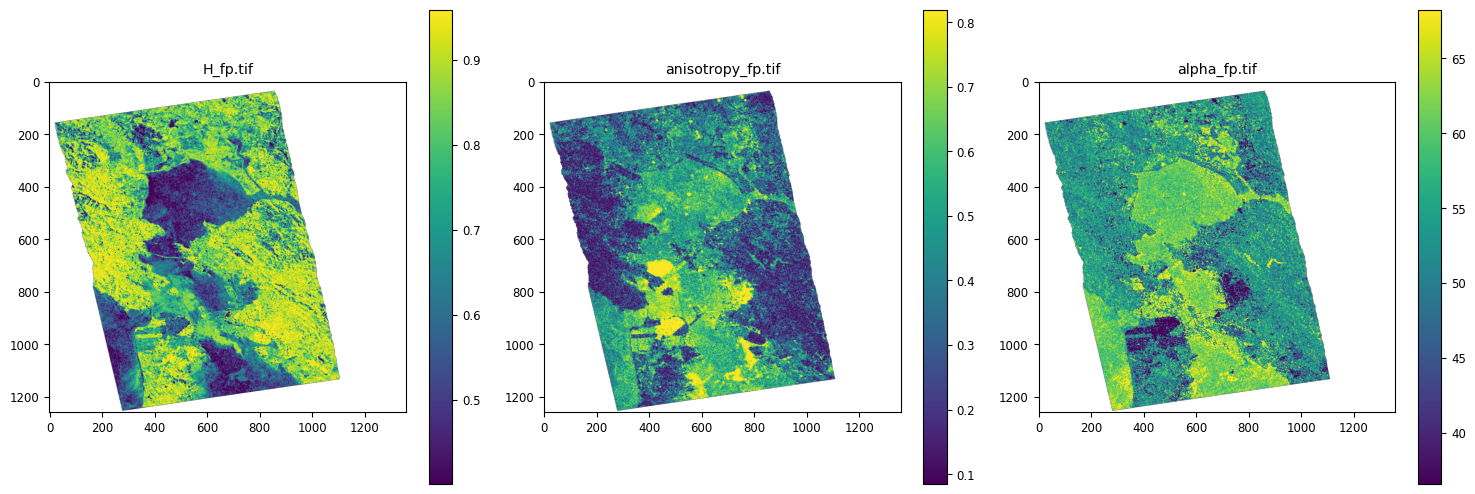

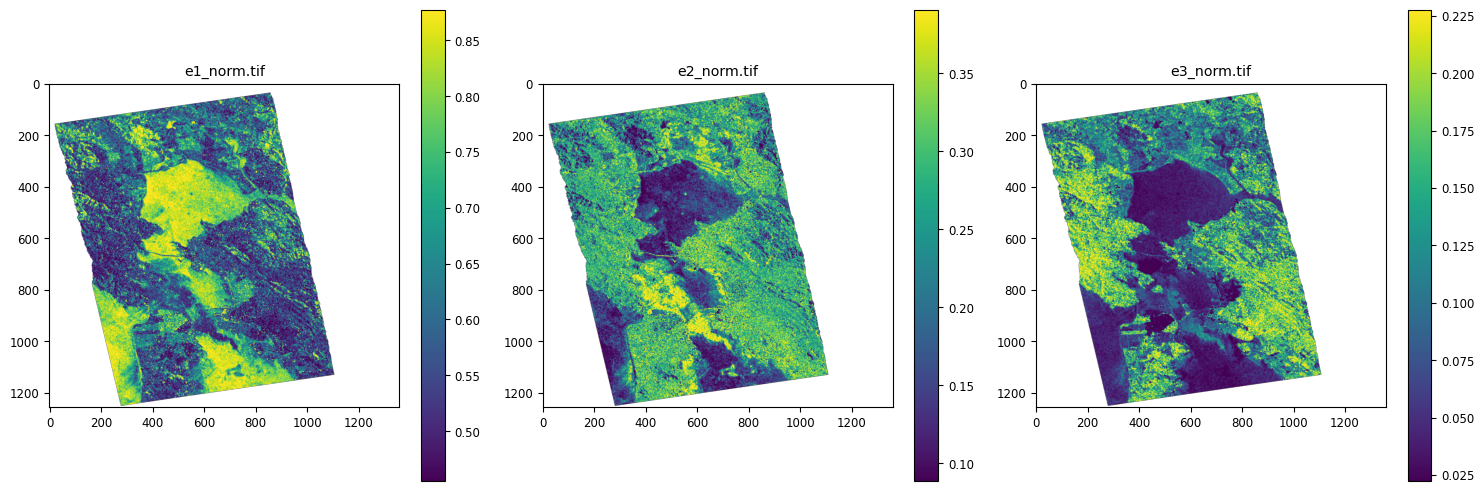

In [6]:

"""
The following function generates H/A/alpha decomposition parameters: 
        Alpha, entropy, anisotropy, and 
        normalized eigen values e1_norm, e2_norm, e3_norm in geotif format

input C3/T3 folder path, window_size is optional  

"""
# update the C3 folder based on your folder

pst.halphafp(C3Folder,window_size=3) 


### Plotting
plot_images(os.path.join(C3Folder,'H_fp.tif'),
             os.path.join(C3Folder,'anisotropy_fp.tif'),
              os.path.join(C3Folder,'alpha_fp.tif'))

plot_images(os.path.join(C3Folder,'e1_norm.tif'),
             os.path.join(C3Folder,'e2_norm.tif'),
             os.path.join(C3Folder,'e3_norm.tif'))




#### Plot Entropy-Alpha 2D plane

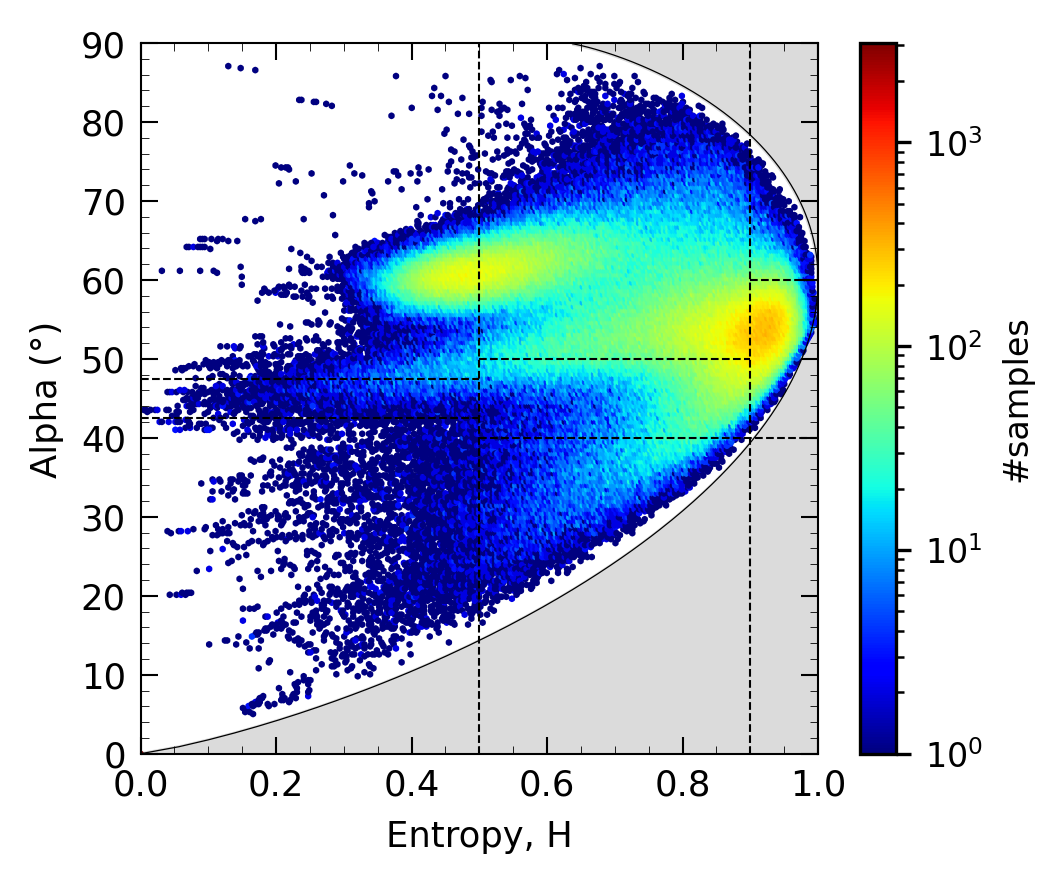

In [7]:
hFile = C3Folder + '/H_fp.tif'
alphaFile = C3Folder + '/alpha_fp.tif'

pst.halpha_plot_fp(hFile,alphaFile,cmap='jet',               
                   norm='log',
                   # path = '',# give a name.png to save the plot as png 
                  zone_lines=True,
                  zone_ids=False,)

#### Plot a 3D Entropy-Anisotropy-Alpha plot

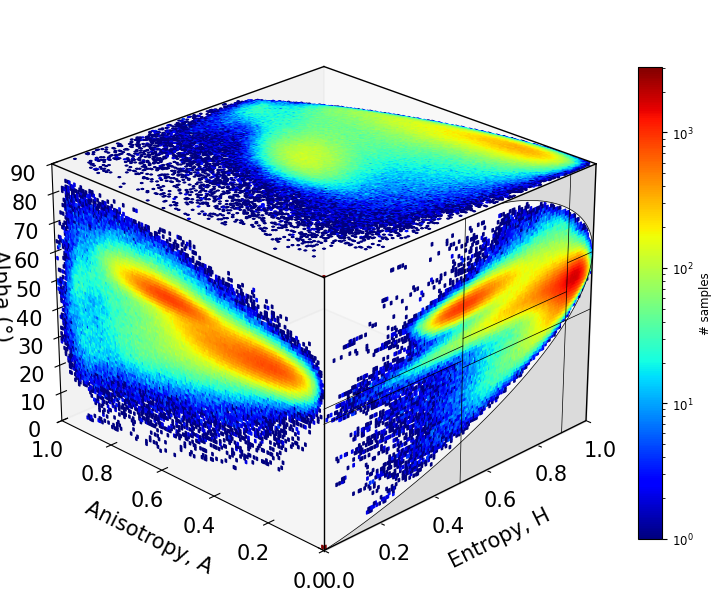

In [8]:
hFile = C3Folder + '/H_fp.tif'
aFile = C3Folder + '/anisotropy_fp.tif'
alphaFile = C3Folder + '/alpha_fp.tif'

pst.haalpha_plot_fp(hFile,aFile,alphaFile,cmap='jet',               
                   norm='log',
                   # path = '',# give a name.png to save the plot as png 
                  zone_lines=True,
                  # zone_ids=False,
                   )

#### 4.2. Generate model-free 3-component decomposition parameters

Progress: 100%|███████████████████████████████████████████████████████████████████████| 9/9 [00:17<00:00,  1.94s/block]


Saved file ./NISAR/GSLC_QP\rlee_3x3\C3\Ps_mf3cf.tif
Saved file ./NISAR/GSLC_QP\rlee_3x3\C3\Pd_mf3cf.tif
Saved file ./NISAR/GSLC_QP\rlee_3x3\C3\Pv_mf3cf.tif
Saved file ./NISAR/GSLC_QP\rlee_3x3\C3\Theta_FP_mf3cf.tif
Execution time for mf3cf: 18.00 seconds


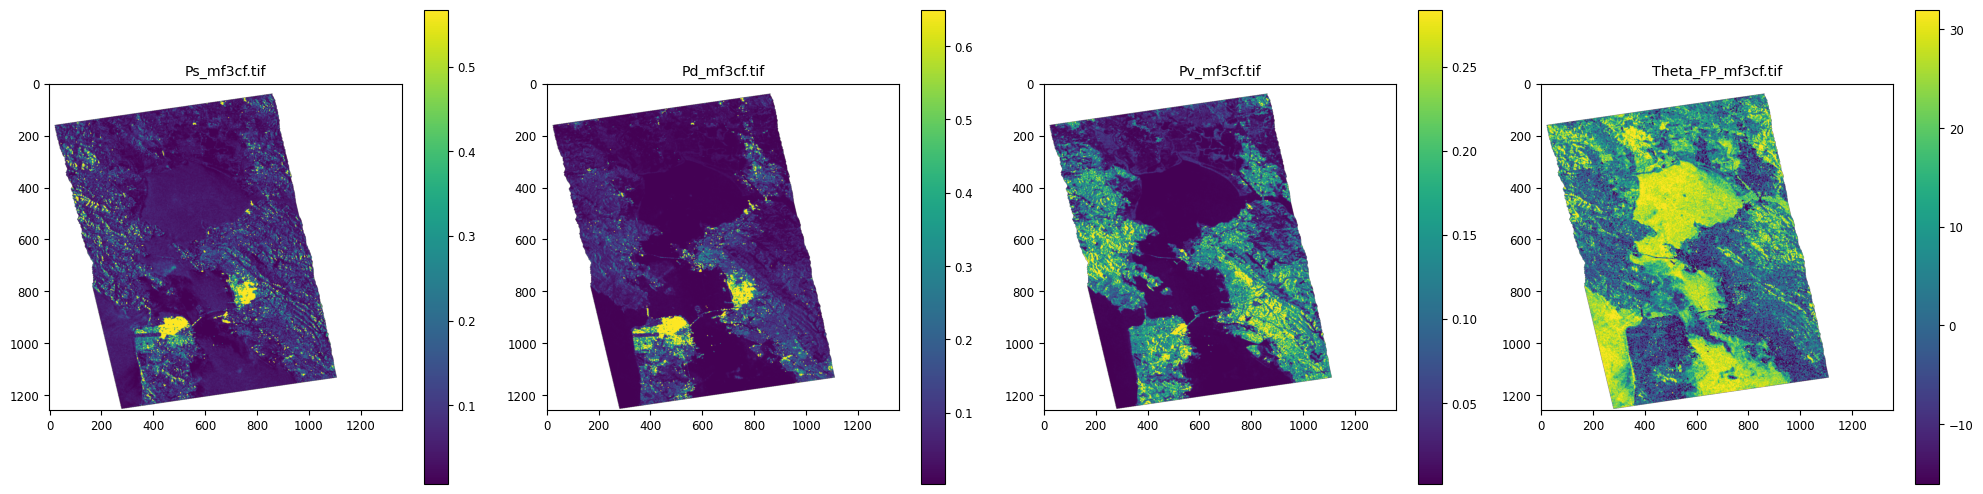

In [9]:
"""
The following function generates model-free/non-model 3-component decomposition parameters: 
        Ps_mf3cf, Pd_mf3cf, Pv_mf3cf and Theta_FP_mf3cf in geotif format

input C3/T3 folder path, window_size is optional  

"""

pst.mf3cf(C3Folder,window_size=3) 


### Plotting
plot_images(os.path.join(C3Folder,'Ps_mf3cf.tif'),
             os.path.join(C3Folder,'Pd_mf3cf.tif'),
              os.path.join(C3Folder,'Pv_mf3cf.tif'),
           os.path.join(C3Folder,'Theta_FP_mf3cf.tif'))

#### Plot Entropy-Theta on 2D plane

Note: $\overline{H}=1-H$ and $\overline{\theta}_{FP}=2*\theta$

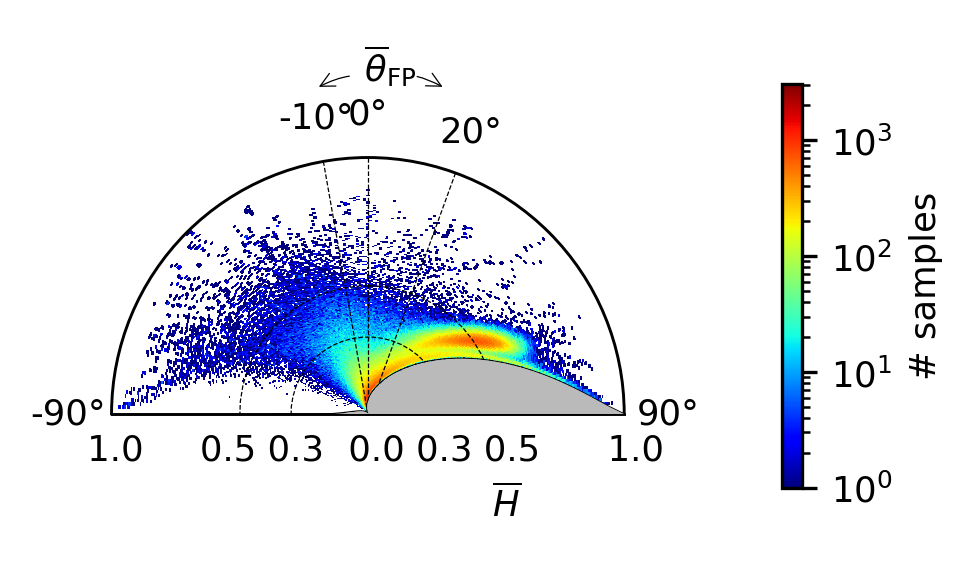

In [10]:
hFile = C3Folder + '/H_fp.tif'
thetaFile = C3Folder + '/Theta_FP_mf3cf.tif'

pst.htheta_plot_fp(hFile, thetaFile,
                  norm='log',
                  )

#### Create False colour RGB from decomposed powers

RGB image saved as ./NISAR/GSLC_QP\rlee_3x3\C3\RGB.png
Execution time for rgb: 0.00 seconds


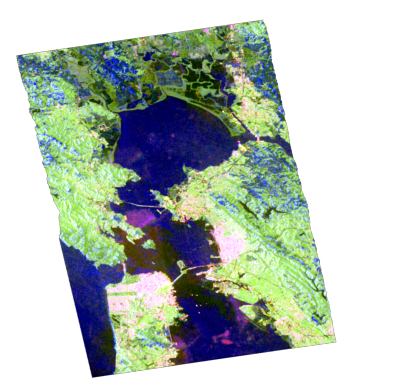

In [11]:
blue = os.path.join(C3Folder,'Ps_mf3cf.tif')
red = os.path.join(C3Folder,'Pd_mf3cf.tif')
green = os.path.join(C3Folder,'Pv_mf3cf.tif')

pst.rgb(red,green,blue)


#### 4.3. Generate Yamaguchi 4-Component Decomposition parameters

In [12]:
"""
The following function generates Yamaguchi 4-Component Decomposition parameters: 
        Yam4co_odd, Yam4co_dbl, Yam4co_vol and Yam4co_hlx in geotif format

input C3/T3 folder path, window_size is optional  

"""

pst.yam4cfp(C3Folder,window_size=3) 

Progress: 100%|███████████████████████████████████████████████████████████████████████| 9/9 [01:01<00:00,  6.84s/block]


Saved file ./NISAR/GSLC_QP\rlee_3x3\C3\Yam4co_odd.tif
Saved file ./NISAR/GSLC_QP\rlee_3x3\C3\Yam4co_dbl.tif
Saved file ./NISAR/GSLC_QP\rlee_3x3\C3\Yam4co_vol.tif
Saved file ./NISAR/GSLC_QP\rlee_3x3\C3\Yam4co_hlx.tif
Execution time for yam4cfp: 01:02 (min:sec)


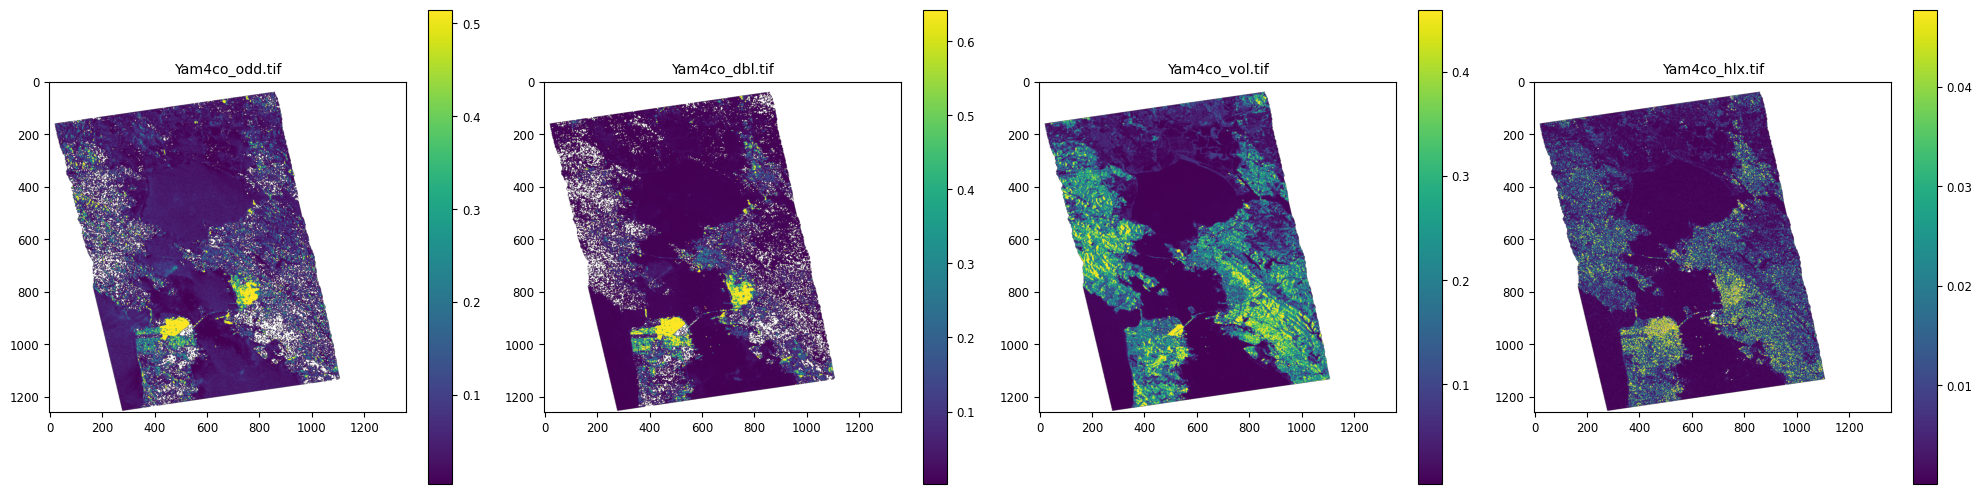

In [13]:
### Plotting
plot_images(os.path.join(C3Folder,'Yam4co_odd.tif'),
            os.path.join(C3Folder,'Yam4co_dbl.tif'),
            os.path.join(C3Folder,'Yam4co_vol.tif'),
            os.path.join(C3Folder,'Yam4co_hlx.tif'),
           )

#### Create False colour RGB from decomposed powers

RGB image saved as ./NISAR/GSLC_QP\rlee_3x3\C3\RGB.png
Execution time for rgb: 0.00 seconds


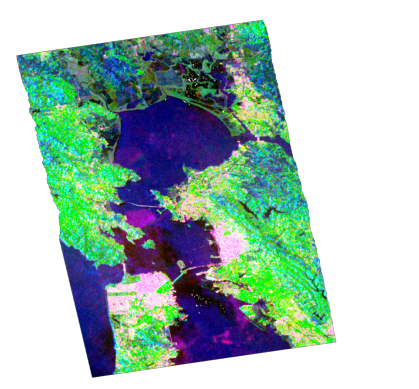

In [14]:

blue = os.path.join(C3Folder,'Yam4co_odd.tif')
red = os.path.join(C3Folder,'Yam4co_dbl.tif')
green = os.path.join(C3Folder,'Yam4co_vol.tif')

pst.rgb(red,green,blue)
